In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
import os

# Add src to path
sys.path.append(os.path.abspath('../'))
import config

# Set random seeds
config.set_random_seeds()

# Ensure directories
config.ensure_directories()

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports complete")
print(f"✓ Random seed set to {config.RANDOM_SEED}")
print(f"✓ Results directories created")

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'


✓ Imports complete
✓ Random seed set to 42
✓ Results directories created


## 1. Load Both Datasets

In [2]:
# Load card_transdata.csv (Synthetic)
df_card = pd.read_csv(config.CARD_TRANSDATA_PATH)
print("\n" + "="*70)
print("DATASET 1: card_transdata.csv (Synthetic)")
print("="*70)
print(f"Shape: {df_card.shape}")
print(f"Features: {df_card.columns.tolist()}")
print(f"\nFirst 5 rows:")
display(df_card.head())

# Basic info
print(f"\nData Types:")
print(df_card.dtypes)
print(f"\nMissing Values:")
print(df_card.isnull().sum())


DATASET 1: card_transdata.csv (Synthetic)
Shape: (1000000, 8)
Features: ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']

First 5 rows:


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0



Data Types:
distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

Missing Values:
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [3]:
# Load creditcard.csv (Real-world)
df_credit = pd.read_csv(config.CREDITCARD_PATH)
print("\n" + "="*70)
print("DATASET 2: creditcard.csv (Real-world ULB)")
print("="*70)
print(f"Shape: {df_credit.shape}")
print(f"Features: {df_credit.columns.tolist()}")
print(f"\nFirst 5 rows:")
display(df_credit.head())

# Basic info
print(f"\nData Types:")
print(df_credit.dtypes)
print(f"\nMissing Values:")
print(df_credit.isnull().sum())


DATASET 2: creditcard.csv (Real-world ULB)
Shape: (284807, 31)
Features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 2. Class Distribution Comparison

The most critical aspect: How imbalanced is each dataset?

In [4]:
# Class distribution for card_transdata
card_fraud_count = df_card[config.CARD_TRANSDATA_TARGET].sum()
card_total = len(df_card)
card_fraud_pct = (card_fraud_count / card_total) * 100

print("\n" + "="*70)
print("CLASS DISTRIBUTION: card_transdata.csv")
print("="*70)
print(f"Total transactions: {card_total:,}")
print(f"Fraudulent: {card_fraud_count:,} ({card_fraud_pct:.4f}%)")
print(f"Legitimate: {card_total - card_fraud_count:,} ({100 - card_fraud_pct:.4f}%)")
print(f"Imbalance ratio: 1:{(card_total - card_fraud_count) / card_fraud_count:.1f}")

# Class distribution for creditcard
credit_fraud_count = df_credit[config.CREDITCARD_TARGET].sum()
credit_total = len(df_credit)
credit_fraud_pct = (credit_fraud_count / credit_total) * 100

print("\n" + "="*70)
print("CLASS DISTRIBUTION: creditcard.csv")
print("="*70)
print(f"Total transactions: {credit_total:,}")
print(f"Fraudulent: {credit_fraud_count:,} ({credit_fraud_pct:.4f}%)")
print(f"Legitimate: {credit_total - credit_fraud_count:,} ({100 - credit_fraud_pct:.4f}%)")
print(f"Imbalance ratio: 1:{(credit_total - credit_fraud_count) / credit_fraud_count:.1f}")


CLASS DISTRIBUTION: card_transdata.csv
Total transactions: 1,000,000
Fraudulent: 87,403.0 (8.7403%)
Legitimate: 912,597.0 (91.2597%)
Imbalance ratio: 1:10.4

CLASS DISTRIBUTION: creditcard.csv
Total transactions: 284,807
Fraudulent: 492 (0.1727%)
Legitimate: 284,315 (99.8273%)
Imbalance ratio: 1:577.9


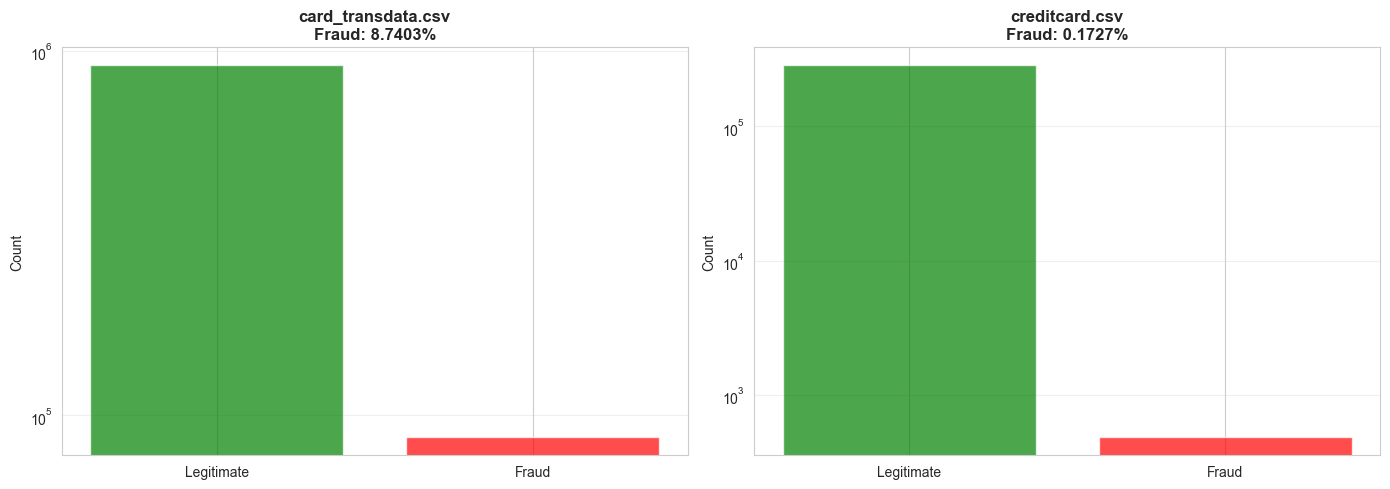


✓ Class distribution comparison saved


In [5]:
# Visualize class distributions side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# card_transdata distribution
card_counts = df_card[config.CARD_TRANSDATA_TARGET].value_counts()
axes[0].bar(['Legitimate', 'Fraud'], [card_counts[0], card_counts[1]], 
            color=['green', 'red'], alpha=0.7)
axes[0].set_title(f'card_transdata.csv\nFraud: {card_fraud_pct:.4f}%', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_yscale('log')
axes[0].grid(axis='y', alpha=0.3)

# creditcard distribution
credit_counts = df_credit[config.CREDITCARD_TARGET].value_counts()
axes[1].bar(['Legitimate', 'Fraud'], [credit_counts[0], credit_counts[1]], 
            color=['green', 'red'], alpha=0.7)
axes[1].set_title(f'creditcard.csv\nFraud: {credit_fraud_pct:.4f}%', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].set_yscale('log')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(config.CROSS_DATASET_FIGURES / 'class_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Class distribution comparison saved")

## 3. Feature Space Comparison

**Key Difference**: card_transdata has interpretable features, creditcard has PCA-transformed features


FEATURE STATISTICS: card_transdata.csv
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673   

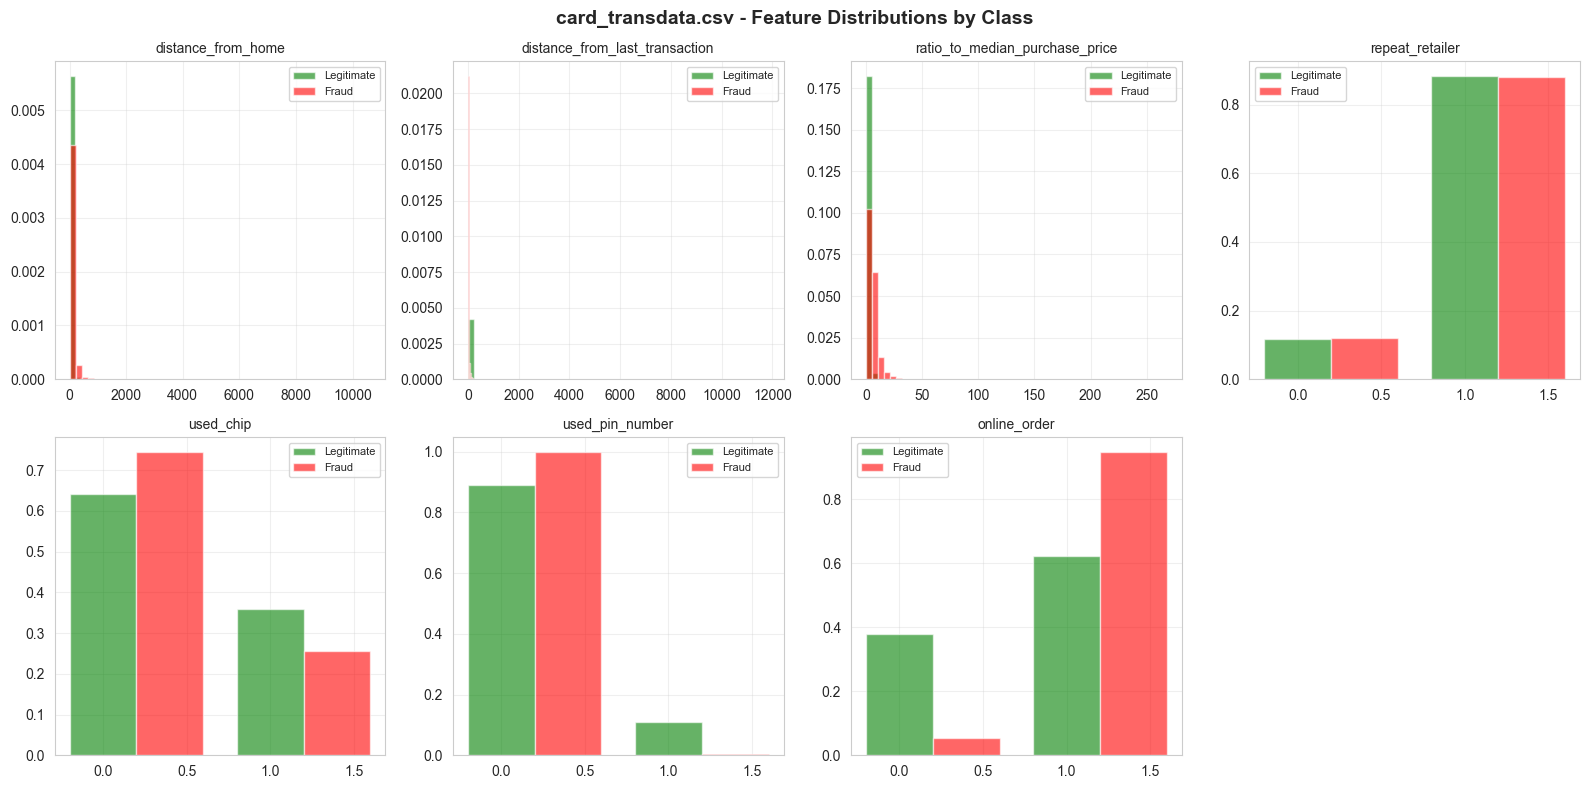


✓ card_transdata feature distributions saved


In [6]:
# card_transdata feature statistics
print("\n" + "="*70)
print("FEATURE STATISTICS: card_transdata.csv")
print("="*70)
print(df_card[config.CARD_TRANSDATA_FEATURES].describe())

# Visualize card_transdata features
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for idx, col in enumerate(config.CARD_TRANSDATA_FEATURES):
    if df_card[col].nunique() > 2:  # Continuous features
        axes[idx].hist(df_card[df_card[config.CARD_TRANSDATA_TARGET]==0][col], 
                       bins=50, alpha=0.6, label='Legitimate', color='green', density=True)
        axes[idx].hist(df_card[df_card[config.CARD_TRANSDATA_TARGET]==1][col], 
                       bins=50, alpha=0.6, label='Fraud', color='red', density=True)
    else:  # Binary features
        fraud_vals = df_card[df_card[config.CARD_TRANSDATA_TARGET]==1][col].value_counts(normalize=True)
        legit_vals = df_card[df_card[config.CARD_TRANSDATA_TARGET]==0][col].value_counts(normalize=True)
        axes[idx].bar([0, 1], [legit_vals.get(0, 0), legit_vals.get(1, 0)], 
                      alpha=0.6, label='Legitimate', color='green', width=0.4)
        axes[idx].bar([0.4, 1.4], [fraud_vals.get(0, 0), fraud_vals.get(1, 0)], 
                      alpha=0.6, label='Fraud', color='red', width=0.4)
    
    axes[idx].set_title(col, fontsize=10)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

axes[-1].axis('off')  # Hide empty subplot
plt.suptitle('card_transdata.csv - Feature Distributions by Class', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(config.CARD_TRANSDATA_FIGURES / 'feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ card_transdata feature distributions saved")


FEATURE STATISTICS: creditcard.csv (Sample: V1-V5, Amount)
                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

              Amount  
count  284807.000000  
mean       88.349619  
std       250.120109  
min         0.000000  
25%         5.600000  
50%        22.000000  
75%        77.165000  
max     25691.160000  


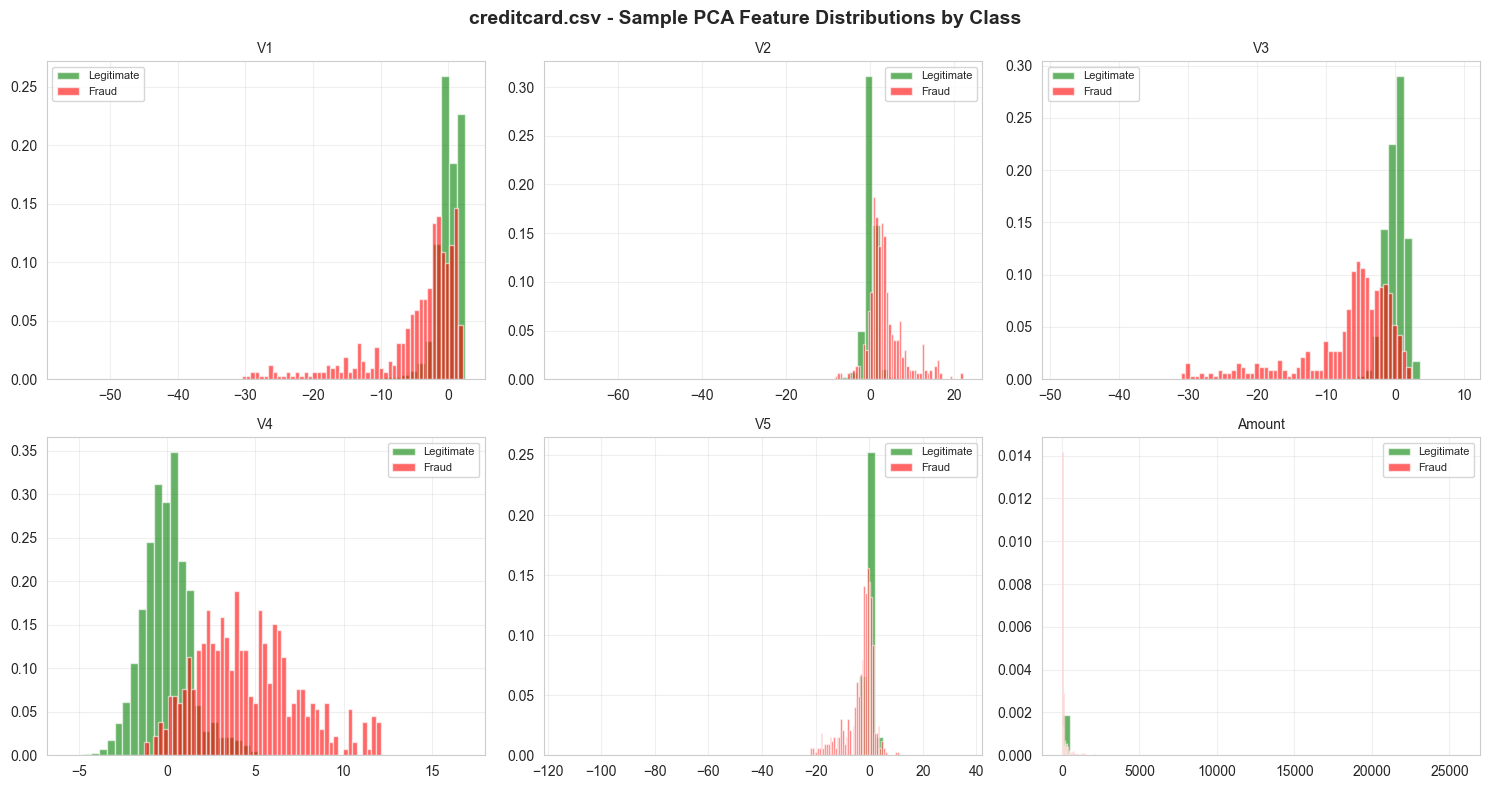


✓ creditcard feature distributions saved


In [7]:
# creditcard feature statistics (sample of PCA components)
print("\n" + "="*70)
print("FEATURE STATISTICS: creditcard.csv (Sample: V1-V5, Amount)")
print("="*70)
sample_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']
print(df_credit[sample_features].describe())

# Visualize sample PCA features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(sample_features):
    axes[idx].hist(df_credit[df_credit[config.CREDITCARD_TARGET]==0][col], 
                   bins=50, alpha=0.6, label='Legitimate', color='green', density=True)
    axes[idx].hist(df_credit[df_credit[config.CREDITCARD_TARGET]==1][col], 
                   bins=50, alpha=0.6, label='Fraud', color='red', density=True)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.suptitle('creditcard.csv - Sample PCA Feature Distributions by Class', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(config.CREDITCARD_FIGURES / 'pca_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ creditcard feature distributions saved")

## 4. Dataset Difficulty Analysis

Use statistical tests to quantify feature separability (proxy for classification difficulty)

In [8]:
# Function to compute feature separability (Cohen's d)
def cohens_d(group1, group2):
    """Compute Cohen's d effect size"""
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return abs((group1.mean() - group2.mean()) / pooled_std)

# Analyze card_transdata separability
print("\n" + "="*70)
print("FEATURE SEPARABILITY: card_transdata.csv")
print("="*70)
print("Cohen's d (effect size): 0.2=small, 0.5=medium, 0.8=large\n")

card_separability = {}
for col in config.CARD_TRANSDATA_FEATURES:
    if df_card[col].nunique() > 2:  # Continuous features only
        fraud_vals = df_card[df_card[config.CARD_TRANSDATA_TARGET]==1][col]
        legit_vals = df_card[df_card[config.CARD_TRANSDATA_TARGET]==0][col]
        d = cohens_d(fraud_vals, legit_vals)
        card_separability[col] = d
        print(f"{col:40s}: {d:.4f}")

card_avg_separability = np.mean(list(card_separability.values()))
print(f"\nAverage Cohen's d: {card_avg_separability:.4f}")


FEATURE SEPARABILITY: card_transdata.csv
Cohen's d (effect size): 0.2=small, 0.5=medium, 0.8=large

distance_from_home                      : 0.6761
distance_from_last_transaction          : 0.3268
ratio_to_median_purchase_price          : 1.8460

Average Cohen's d: 0.9497


In [9]:
# Analyze creditcard separability (sample features)
print("\n" + "="*70)
print("FEATURE SEPARABILITY: creditcard.csv (V1-V10 sample)")
print("="*70)
print("Cohen's d (effect size): 0.2=small, 0.5=medium, 0.8=large\n")

credit_separability = {}
sample_pca = [f'V{i}' for i in range(1, 11)]
for col in sample_pca:
    fraud_vals = df_credit[df_credit[config.CREDITCARD_TARGET]==1][col]
    legit_vals = df_credit[df_credit[config.CREDITCARD_TARGET]==0][col]
    d = cohens_d(fraud_vals, legit_vals)
    credit_separability[col] = d
    print(f"{col:10s}: {d:.4f}")

credit_avg_separability = np.mean(list(credit_separability.values()))
print(f"\nAverage Cohen's d (sample): {credit_avg_separability:.4f}")


FEATURE SEPARABILITY: creditcard.csv (V1-V10 sample)
Cohen's d (effect size): 0.2=small, 0.5=medium, 0.8=large

V1        : 2.4531
V2        : 2.2075
V3        : 4.7356
V4        : 3.2425
V5        : 2.2974
V6        : 1.0520
V7        : 4.5904
V8        : 0.4787
V9        : 2.3648
V10       : 5.3500

Average Cohen's d (sample): 2.8772


In [10]:
# Create comparison summary table
comparison_df = pd.DataFrame({
    'Metric': [
        'Total Transactions',
        'Number of Features',
        'Fraud Rate (%)',
        'Imbalance Ratio (1:X)',
        'Feature Type',
        'Avg Feature Separability (Cohen\'s d)',
        'Dataset Role',
        'Expected Baseline Performance'
    ],
    'card_transdata.csv (Synthetic)': [
        f"{card_total:,}",
        len(config.CARD_TRANSDATA_FEATURES),
        f"{card_fraud_pct:.4f}",
        f"{(card_total - card_fraud_count) / card_fraud_count:.1f}",
        "Interpretable",
        f"{card_avg_separability:.4f}",
        "Architecture Exploration",
        "Random Forest dominant (PR-AUC → 1.0)"
    ],
    'creditcard.csv (Real-world)': [
        f"{credit_total:,}",
        len(config.CREDITCARD_FEATURES),
        f"{credit_fraud_pct:.4f}",
        f"{(credit_total - credit_fraud_count) / credit_fraud_count:.1f}",
        "PCA-transformed",
        f"{credit_avg_separability:.4f}",
        "Production Validation",
        "Competitive baselines (challenging)"
    ]
})

print("\n" + "="*70)
print("DUAL-DATASET COMPARISON SUMMARY")
print("="*70)
display(comparison_df)

# Save to CSV
comparison_df.to_csv(config.CROSS_DATASET_TABLES / 'dataset_comparison.csv', index=False)
print("\n✓ Dataset comparison table saved")


DUAL-DATASET COMPARISON SUMMARY


,Metric,card_transdata.csv (Synthetic),creditcard.csv (Real-world)
0,Total Transactions,"1,000,000","284,807"
1,Number of Features,7,30
2,Fraud Rate (%),8.7403,0.1727
3,Imbalance Ratio (1:X),10.4,577.9
4,Feature Type,Interpretable,PCA-transformed
5,Avg Feature Separability (Cohen's d),0.9497,2.8772
6,Dataset Role,Architecture Exploration,Production Validation
7,Expected Baseline Performance,Random Forest dominant (PR-AUC → 1.0),Competitive baselines (challenging)



✓ Dataset comparison table saved


## 5. Why Neural Networks? Beyond Beating Baselines

### The Case for Neural Networks in Fraud Detection

This project does **NOT** claim neural networks always beat Random Forest or Logistic Regression. Instead, we demonstrate:

#### 1. **Transferable Design Principles**
- Architectural choices (depth vs width) discovered on synthetic data generalize to real data
- Regularization strategies (dropout, L2, batch norm) work across data regimes
- Principled design process vs black-box hyperparameter search

#### 2. **Controlled Overfitting**
- High-capacity models can be regularized to generalize
- Training-validation gap monitoring ensures stability
- Early stopping prevents memorization

#### 3. **Interpretable Architecture**
- Layer-by-layer hierarchical feature learning
- Systematic ablation studies isolate component effects
- Reproducible experimental protocol

#### 4. **Production Readiness**
- Threshold optimization for precision/recall tradeoffs
- Scalability to large datasets
- Probabilistic outputs enable cost-sensitive decisions

### Expected Outcomes

**On card_transdata.csv (Synthetic)**:
- Random Forest likely achieves PR-AUC ≈ 1.0 (near-perfect)
- This is **acceptable** - synthetic data enables clean ablation studies
- Value lies in understanding NN design principles, not beating baselines

**On creditcard.csv (Real-world)**:
- Neural networks demonstrate competitive performance
- Design principles from synthetic data generalize
- Controlled overfitting despite extreme imbalance
- Production-grade validation of architectural insights

## 6. Dual-Dataset Experimental Workflow

```
┌─────────────────────────────────────────────────────────────────┐
│ Phase 1: ARCHITECTURE EXPLORATION (card_transdata.csv)         │
├─────────────────────────────────────────────────────────────────┤
│ 1. EDA and baseline training (LR, RF)                          │
│ 2. Test 8 architectures: shallow/medium/deep/wide              │
│ 3. Conduct ablation: +dropout, +L2, +batchnorm                 │
│ 4. Select best architecture by validation PR-AUC               │
│                                                                 │
│ OUTPUT: Best architecture config (e.g., [256, 128, 64])        │
└─────────────────────────────────────────────────────────────────┘
                              ↓
┌─────────────────────────────────────────────────────────────────┐
│ Phase 2: REGULARIZATION OPTIMIZATION (creditcard.csv)          │
├─────────────────────────────────────────────────────────────────┤
│ 1. EDA and baseline training (LR, RF) on NEW dataset           │
│ 2. Apply best architecture from Phase 1                        │
│ 3. Test regularization: dropout [0.2-0.4], L2 [0.001-0.01]     │
│ 4. Select best model by validation PR-AUC                      │
│ 5. Optimize classification threshold on validation set         │
│                                                                 │
│ OUTPUT: Production-ready model with optimized threshold        │
└─────────────────────────────────────────────────────────────────┘
                              ↓
┌─────────────────────────────────────────────────────────────────┐
│ Phase 3: ONE-TIME TEST EVALUATION (creditcard.csv)             │
├─────────────────────────────────────────────────────────────────┤
│ 1. Load best model and optimized threshold                     │
│ 2. Evaluate on held-out test set EXACTLY ONCE                  │
│ 3. Compare to baseline performance on test set                 │
│ 4. Error analysis (FP/FN patterns, business costs)             │
│                                                                 │
│ OUTPUT: Final test performance (reported as-is)                │
└─────────────────────────────────────────────────────────────────┘
```

## 7. Save EDA Summaries

In [11]:
# card_transdata EDA summary
card_eda_summary = pd.DataFrame({
    'metric': [
        'total_transactions',
        'fraud_count',
        'legitimate_count',
        'fraud_rate_pct',
        'imbalance_ratio',
        'num_features',
        'avg_feature_separability_cohens_d'
    ],
    'value': [
        card_total,
        card_fraud_count,
        card_total - card_fraud_count,
        card_fraud_pct,
        (card_total - card_fraud_count) / card_fraud_count,
        len(config.CARD_TRANSDATA_FEATURES),
        card_avg_separability
    ]
})
card_eda_summary.to_csv(config.CARD_TRANSDATA_TABLES / 'eda_summary.csv', index=False)
print("✓ card_transdata EDA summary saved")

# creditcard EDA summary
credit_eda_summary = pd.DataFrame({
    'metric': [
        'total_transactions',
        'fraud_count',
        'legitimate_count',
        'fraud_rate_pct',
        'imbalance_ratio',
        'num_features',
        'avg_feature_separability_cohens_d_sample'
    ],
    'value': [
        credit_total,
        credit_fraud_count,
        credit_total - credit_fraud_count,
        credit_fraud_pct,
        (credit_total - credit_fraud_count) / credit_fraud_count,
        len(config.CREDITCARD_FEATURES),
        credit_avg_separability
    ]
})
credit_eda_summary.to_csv(config.CREDITCARD_TABLES / 'eda_summary.csv', index=False)
print("✓ creditcard EDA summary saved")

✓ card_transdata EDA summary saved
✓ creditcard EDA summary saved


## 8. Summary & Next Steps

In [12]:
print("\n" + "="*70)
print(" NOTEBOOK 01 SUMMARY - DUAL-DATASET OVERVIEW")
print("="*70)

print("\n📊 Dataset 1: card_transdata.csv (Synthetic)")
print(f"  - {card_total:,} transactions, {len(config.CARD_TRANSDATA_FEATURES)} features")
print(f"  - Fraud rate: {card_fraud_pct:.4f}% (1:{(card_total - card_fraud_count) / card_fraud_count:.1f} imbalance)")
print(f"  - Feature separability: {card_avg_separability:.4f} (Cohen's d)")
print(f"  - Role: Architecture exploration, ablation studies")
print(f"  - Expected: Random Forest dominance (PR-AUC → 1.0)")

print("\n📊 Dataset 2: creditcard.csv (Real-world)")
print(f"  - {credit_total:,} transactions, {len(config.CREDITCARD_FEATURES)} features")
print(f"  - Fraud rate: {credit_fraud_pct:.4f}% (1:{(credit_total - credit_fraud_count) / credit_fraud_count:.1f} imbalance)")
print(f"  - Feature separability: {credit_avg_separability:.4f} (Cohen's d, sample)")
print(f"  - Role: Production validation, final evaluation")
print(f"  - Expected: Competitive baselines, challenging dataset")

print("\n🎯 Neural Network Value Proposition:")
print("  ✓ Transferable design principles across data regimes")
print("  ✓ Controlled overfitting through regularization")
print("  ✓ Interpretable architecture design process")
print("  ✓ Production-ready threshold optimization")

print("\n📁 Artifacts Created:")
artifacts = [
    str(config.CROSS_DATASET_FIGURES / 'class_distribution_comparison.png'),
    str(config.CARD_TRANSDATA_FIGURES / 'feature_distributions.png'),
    str(config.CREDITCARD_FIGURES / 'pca_feature_distributions.png'),
    str(config.CROSS_DATASET_TABLES / 'dataset_comparison.csv'),
    str(config.CARD_TRANSDATA_TABLES / 'eda_summary.csv'),
    str(config.CREDITCARD_TABLES / 'eda_summary.csv')
]
for artifact in artifacts:
    print(f"   {artifact}")

print("\n✅ Notebook 01 Complete!")
print("🚀 Ready for Notebook 02: card_transdata Preprocessing & Baselines")
print("="*70)


 NOTEBOOK 01 SUMMARY - DUAL-DATASET OVERVIEW

📊 Dataset 1: card_transdata.csv (Synthetic)
  - 1,000,000 transactions, 7 features
  - Fraud rate: 8.7403% (1:10.4 imbalance)
  - Feature separability: 0.9497 (Cohen's d)
  - Role: Architecture exploration, ablation studies
  - Expected: Random Forest dominance (PR-AUC → 1.0)

📊 Dataset 2: creditcard.csv (Real-world)
  - 284,807 transactions, 30 features
  - Fraud rate: 0.1727% (1:577.9 imbalance)
  - Feature separability: 2.8772 (Cohen's d, sample)
  - Role: Production validation, final evaluation
  - Expected: Competitive baselines, challenging dataset

🎯 Neural Network Value Proposition:
  ✓ Transferable design principles across data regimes
  ✓ Controlled overfitting through regularization
  ✓ Interpretable architecture design process
  ✓ Production-ready threshold optimization

📁 Artifacts Created:
   c:\Users\GOD\Documents\NNfinalProject\results\cross_dataset_analysis\figures\class_distribution_comparison.png
   c:\Users\GOD\Document